# Deep Temporal Model for Surgical Phase Recognition
-------------------
**Learning from a tiny dataset of manual annotations: a teacher/student approach for surgical phase recognition (IPCAI 2019)**

_Tong Yu, Didier Mutter, Jacques Marescaux, Nicolas Padoy_

[![arXiv](https://img.shields.io/badge/arxiv-1812.00033-red)](https://arxiv.org/abs/1812.00033)

## Prerequisites

In [ ]:
%%bash
git clone https://github.com/CAMMA-public/Surgical-Phase-Recognition.git
cd Surgical-Phase-Recognition/

In [ ]:
%%bash
pip uninstall -y tensorflow
pip install ruamel_yaml
pip install tensorflow-gpu==1.14

Uninstalling tensorflow-2.3.0:
  Successfully uninstalled tensorflow-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0


In [ ]:
from process_video import phase_recognition, phase_plot

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

## Downloading the data

In [ ]:
VIDPATH = "videos/phase_recognition_example.mp4"

Model checkpoints:

In [ ]:
!wget --content-disposition https://s3.unistra.fr/camma_public/github/phase_recognition/checkpoints.zip

--2020-08-19 14:53:07--  https://seafile.unistra.fr/f/b9134883afbb4753a11a/?dl=1
Resolving seafile.unistra.fr (seafile.unistra.fr)... 130.79.254.37
Connecting to seafile.unistra.fr (seafile.unistra.fr)|130.79.254.37|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://seafile.unistra.fr/seafhttp/files/e91512c9-bdcc-4944-95ca-8ab892c32124/checkpoints.zip [following]
--2020-08-19 14:53:09--  https://seafile.unistra.fr/seafhttp/files/e91512c9-bdcc-4944-95ca-8ab892c32124/checkpoints.zip
Reusing existing connection to seafile.unistra.fr:443.
HTTP request sent, awaiting response... 200 OK
Length: 262814443 (251M) [application/zip]
Saving to: ‘checkpoints.zip’

checkpoints.zip     100%[===================>] 250.64M  11.2MB/s    in 25s     

2020-08-19 14:53:35 (10.1 MB/s) - ‘checkpoints.zip’ saved [262814443/262814443]



Video samples:

In [ ]:
!wget --content-disposition https://s3.unistra.fr/camma_public/github/phase_recognition/videos.zip

--2020-08-19 14:53:36--  https://seafile.unistra.fr/f/c7841fdbb6144fa1acb0/?dl=1
Resolving seafile.unistra.fr (seafile.unistra.fr)... 130.79.254.37
Connecting to seafile.unistra.fr (seafile.unistra.fr)|130.79.254.37|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://seafile.unistra.fr/seafhttp/files/d900addf-c034-43c2-8df0-d11668110d8b/videos.zip [following]
--2020-08-19 14:53:38--  https://seafile.unistra.fr/seafhttp/files/d900addf-c034-43c2-8df0-d11668110d8b/videos.zip
Reusing existing connection to seafile.unistra.fr:443.
HTTP request sent, awaiting response... 200 OK
Length: 557696758 (532M) [application/zip]
Saving to: ‘videos.zip’

videos.zip          100%[===================>] 531.86M  10.8MB/s    in 51s     

2020-08-19 14:54:30 (10.4 MB/s) - ‘videos.zip’ saved [557696758/557696758]



Unzipping:

In [ ]:
!unzip videos.zip

Archive:  videos.zip
   creating: videos/
  inflating: videos/phase_recognition_example.mp4  
  inflating: videos/phase_recognition_example_mini.mp4  


In [ ]:
!unzip checkpoints.zip

Archive:  checkpoints.zip
   creating: checkpoints/
   creating: checkpoints/cnn/
  inflating: checkpoints/cnn/cnn.ckpt.data-00000-of-00001  
  inflating: checkpoints/cnn/cnn.ckpt.index  
  inflating: checkpoints/cnn/cnn.ckpt.meta  
   creating: checkpoints/temporal/
  inflating: checkpoints/temporal/temporal.ckpt.data-00000-of-00001  
  inflating: checkpoints/temporal/temporal.ckpt.index  
  inflating: checkpoints/temporal/temporal.ckpt.meta  


Phase lookup table:

In [ ]:
PHASES = [
    "Preparation",
    "CalotTriangleDissection",
    "ClippingAndCutting",
    "GallbladderDissection",
    "GallbladderPackaging",
    "CleaningAndCoagulation",
    "GallbladderRetraction"
]

## Predicting phases

In [ ]:
phases = phase_recognition(VIDPATH)

ERROR:root:'ini_bias'
 --- DEFAULTING ini_bias TO 0.0


 --- DEFAULTING ini_bias TO 0.0



loaded checkpoints/cnn/cnn.ckpt
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from checkpoints/cnn/cnn.ckpt


INFO:tensorflow:Restoring parameters from checkpoints/cnn/cnn.ckpt
ERROR:root:'use_peephole'
 --- DEFAULTING use_peephole TO 0


 --- DEFAULTING use_peephole TO 0



Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.


Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
ERROR:root:'use_peephole'
 --- DEFAULTING use_peephole TO 0


 --- DEFAULTING use_peephole TO 0
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API


Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API


Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


INFO:tensorflow:Restoring parameters from checkpoints/temporal/temporal.ckpt


INFO:tensorflow:Restoring parameters from checkpoints/temporal/temporal.ckpt


## Visualizing the results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  """


[Text(1, 0, 'Preparation'),
 Text(1, 0, 'CalotTriangleDissection'),
 Text(1, 0, 'ClippingAndCutting'),
 Text(1, 0, 'GallbladderDissection'),
 Text(1, 0, 'GallbladderPackaging'),
 Text(1, 0, 'CleaningAndCoagulation'),
 Text(1, 0, 'GallbladderRetraction')]

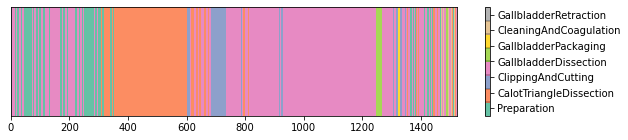

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)
ax.set_yticks([], [])
im = ax.pcolormesh(phases, cmap="Set2", vmin=1, vmax=8)
cbar = fig.colorbar(im, ticks=[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5], orientation="vertical", drawedges=True)
cbar.ax.set_yticklabels(PHASES)